# Visualizing Multiple Data Sets - Part 1: Scatter Plots

As previously mentioned, our first step in working with data sets is typically to gain some basic understanding of the data and relationships among the different data sets using visualizations. In this section, we will start with scatter plots of the data. Then after introducing {doc}`Partitions<partitions>` and {doc}`Summary Statistics<summary-stats>`, we will use these to partition our data before plotting {doc}`Histograms for Partitioned Data<histogram>`. 

Since we will be creating several plots of these data sets, it is convenient to store the values in the appropriate columns of the dataframe as lists or numpy arrays. Here we store the values as numpy arrays to allow us to use some of numpy's built-in methods later in this chapter:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/03-first-data/covid-merged.csv"
)

In [2]:
cases = np.array(df["cases"])
pop = np.array(df["population"])
gdp = np.array(df["gdp"])
urban = np.array(df["urban"])



As previously mentioned, we are interested in how socioeconomic factors may be have impacted the spread of Covid-19, which we measure through the number of cases. Thus, every statistical test we will do will be based on the number of cases.

Let's begin with a scatter plot of the number of cases by state (indexed from 0 to 49):

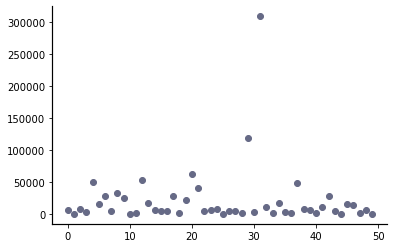

In [3]:
import matplotlib.pyplot as plt

N = 50
plt.scatter(range(N), cases)

There are one or two values that seem to be unusually large in comparison to others, but this could be caused by the fact that states have different populations.  Let's try to get some understanding of how these two factors seem to interact:

## Scatter Plots for Multiple Datasets

The easiest way to create a with multiple datasets is to simply call Matplotlib's multiple times from within a single cell. Let's try that with our cases and population data:

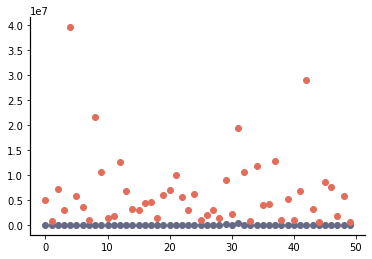

In [4]:
plt.scatter(range(N), cases)
plt.scatter(range(N), pop)

The good news is that Matplotlib knows how to plot multiple data sets on the same plot and automatically picks different colors for the scatter plot markers. We can improve the plot in several ways. First, we can choose a different marker for the population data. Markers can be specified using the `marker` keyword of the scatter function. The value passed is a string that indicates which marker to use. 

Some commonly used marker types include:
```
"."		point
"o"		circle
"s"		square
"+"		plus
"x"		x
```


For a complete list of marker types, consult the Matplotlib documentation:

[matplotlib.markers](https://matplotlib.org/stable/api/markers_api.html)

Let's test this on our plot:

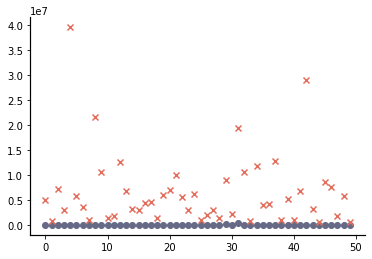

In [5]:
plt.scatter(range(N), cases)
plt.scatter(range(N), pop, marker="x")

Now we can be sure that the orange markers are for the population data -- but someone coming across the graph will not! We can add a legend to convey this information to the viewer. This is most easily done in two steps:
1. When calling `plt.scatter()` for each data set, pass the text that you would like to appear in the legend for that data set using the `label` keyword argument.
2. After all `plt.scatter()` calls are complete, call `plt.legend()` to draw the legend.



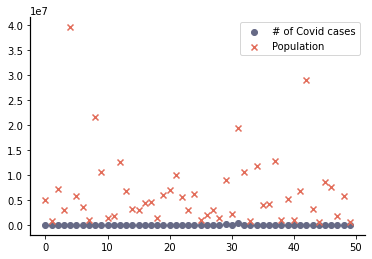

In [6]:
plt.scatter(range(N), cases, label="# of Covid cases")
plt.scatter(range(N), pop, marker="x", label="Population")

plt.legend()

Adding some axis labels finishes the graph:

Text(0, 0.5, 'Number of People/Cases')

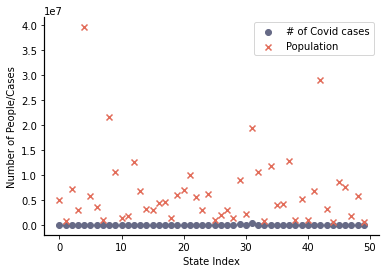

In [7]:
plt.scatter(range(N), cases, label="# of Covid cases")
plt.scatter(range(N), pop, marker="x", label="Population")

plt.legend()
plt.xlabel("State Index")
plt.ylabel("Number of People/Cases")

The bad news is that this graph is not very useful because the variations in the number of cases cannot be discriminated because the range of the number cases is so much smaller than the range of the populations. The NumPy array variables (technically type `np.ndarray`) have a max method that we can use to check this:

In [8]:
cases.max(), pop.max()

(309696, 39512223)

We can better plot these data on the same plot if we use a different $y$-axis for each data set. To do this, we can use Matplotlib's `subplots` function to create a figure and a first axis, and then the `twinx` function to share the **same** $x$-axis but allow a new $y$-axis to be created for the second data set:

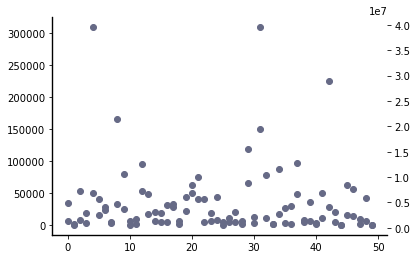

In [9]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases)

ax2 = ax.twinx()
ax2.scatter(range(N), pop)

However, when we create the second set of axes, we lose the differentiation of markers. We can specify the marker color and type of marker symbol used using the `color` and `marker` keywords respectively. 

For example,

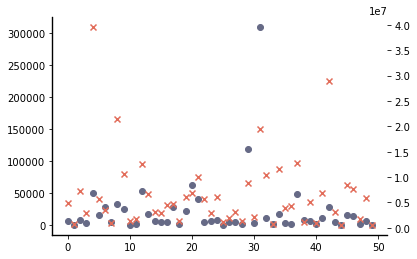

In [37]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases)

ax2 = ax.twinx()
ax2.scatter(range(N), pop, color="#e26d5a", marker="x")

We can add axis labels to each $y$-axis separately. However, because we are using different axes, we need to use the `set_xlabel` and `set_ylabel` methods of the Matplotlib `axis` object to set these labels:


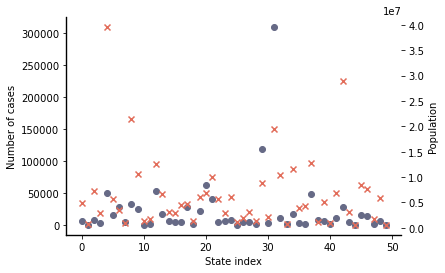

In [38]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases)
ax.set_ylabel("Number of cases")
ax.set_xlabel("State index")

ax2 = ax.twinx()
ax2.scatter(range(N), pop, color="#e26d5a", marker="x")
ax2.set_ylabel("Population");

It is easiest to add separate legends for the different data sets, but we need to specify different locations for the legends (using the `loc` keyword parameter, which takes a numerical argument that specifies different positions) so that they do not overlap:

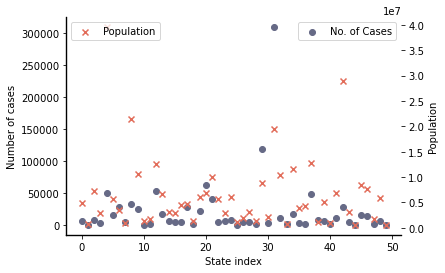

In [39]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases, label="No. of Cases")
ax.set_ylabel("Number of cases")
ax.set_xlabel("State index")

ax2 = ax.twinx()

ax2.scatter(range(N), pop, color="#e26d5a", marker="x", label="Population")
ax2.set_ylabel("Population")

ax.legend()
ax2.legend(loc=2);

We can make a couple of quick fixes to this. First, let's swap the locations of the two legends, so that each legend is close to its corresponding $y$-axis. Second, note that one of the Population points is behind the left legend, and one of the Number of Cases points is higher than the legends. Let's adjust the $y$-limits of these axes so that those points will be lower in the graph:

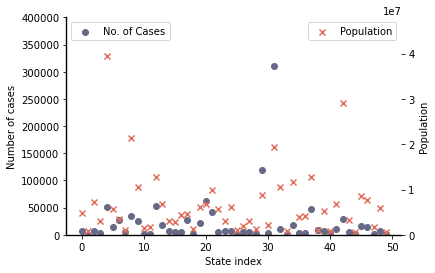

In [40]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases, label="No. of Cases")
ax.set_ylabel("Number of cases")
ax.set_xlabel("State index")

ax2 = ax.twinx()

ax2.scatter(range(N), pop, color="#e26d5a", marker="x", label="Population")
ax2.set_ylabel("Population")

ax.legend(loc=2)
ax2.legend()

ax.set_ylim(0, 4e5)
ax2.set_ylim(0, 4.8e7);

Another common convention is to plot the values in thousands or millions to clean up the axes labels, as shown here:

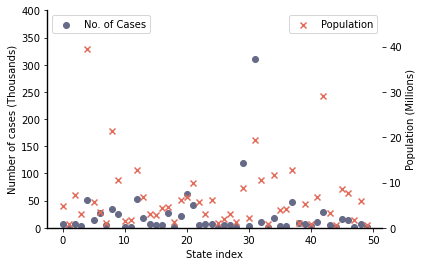

In [41]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases / 1000, label="No. of Cases")
ax.set_ylabel("Number of cases (Thousands)")
ax.set_xlabel("State index")

ax2 = ax.twinx()

ax2.scatter(range(N), pop / 1e6, color="#e26d5a", marker="x", label="Population")
ax2.set_ylabel("Population (Millions)")

ax.legend(loc=2)
ax2.legend()

ax.set_ylim(0, 4e2)
ax2.set_ylim(0, 48);

The relation among these data might be more clear if the data were sorted by population. We can sort the rows of the dataframe by population as follows:

In [15]:
df.sort_values("population", inplace=True)

In [16]:
popS = np.array(df["population"])
casesS = np.array(df["cases"])

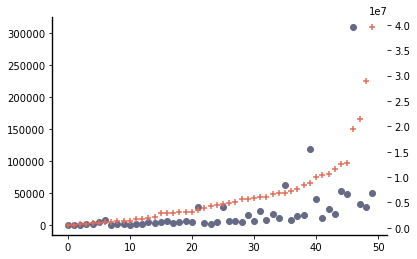

In [42]:
fig, ax = plt.subplots()
ax.scatter(range(N), casesS)

ax2 = ax.twinx()
ax2.scatter(range(N), popS, color="#e26d5a", marker="+")

The number of cases (shown in blue) generally increases with the population of the states. We might make some guesses about how these two variables might be related. Statisticians call such guesses *hypotheses* if they can be formulated as something that can be tested from the data. Two possible hypotheses about how population of a state might affect the number of cases are:
* Each person in the United States has the same probability of getting Covid. Thus, the number of cases per state should increase in proportion to the state's population.
* The probability of getting Covid increases with the population of a state because of what are known as network effects: there is an increasing amount of mixing among the people within the state. Then the number of cases per state should increase with population even faster than under the previous assumption.

Of course, there may be many other hypotheses that explain this relationship. In the remainder of this chapter, we will try to remove some of the underlying effects of different state populations by normalizing the cases and GDP on a per population basis. 

Let's look at how we would do this within our Pandas dataframe. We can create a new column of our dataframe by simply assigning to it. Here, we just use functions of our other dataframe columns:

In [18]:
df["cases_pp"] = df["cases"] / df["population"]
df

,state,cases,population,gdp,urban,cases_pp
49,Wyoming,559,578759,40764.3,64.76,0.000966
44,Vermont,866,623989,34320.2,38.90,0.001388
1,Alaska,353,731545,54674.7,66.02,0.000483
33,North Dakota,1067,762062,57471.9,59.90,0.001400
40,South Dakota,2450,884659,56051.9,56.65,0.002769
7,Delaware,4734,973764,77879.4,83.30,0.004862
38,Rhode Island,8621,1059361,62335.4,90.73,0.008138
25,Montana,452,1068778,54034.7,55.89,0.000423
18,Maine,1095,1344212,68984.9,38.66,0.000815
28,New Hampshire,2146,1359711,88014.8,60.30,0.001578


In [19]:
df["gdp_pp"] = df["gdp"] / df["population"]

As before, we create Numpy arrays of these variables for convenience:

In [20]:
cases_pp = np.array(df["cases_pp"])
gdp_pp = np.array(df["gdp_pp"])

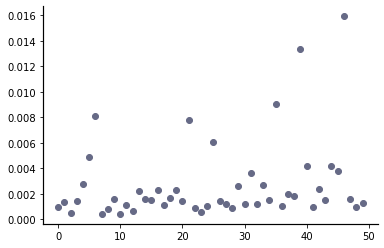

In [21]:
plt.scatter(range(N), cases_pp)

Even with this adjustment, we see that there are some states that have Covid cases/population that are very different than most of the other states. One reason for using scatter plots early in data analysis is to help identify any *outliers*:


````{panels}
DEFINITION
^^^
outlier
: A value in a dataset that takes on a value that is not reasonable, based on the other values in the dataset or other domain knowledge. Outliers are often due to data entry, measurement, or unit conversion errors.
````

One of the reasons to start data visualization with scatter plots is that unlike histograms, they show the whole data and are helpful in spotting outliers.

If you followed the spread of Covid in the United States in spring 2020, you can probably guess which states have these extreme values.

Let's re-sort the data frame based on our new Covid-cases per population column, and we will pass it the keyword argument `ascending=False` to put the highest cases per population first:

In [22]:
df.sort_values("cases_pp", inplace=True, ascending=False)
df

,state,cases,population,gdp,urban,cases_pp,gdp_pp
31,New York,309696,19453561,1791566.8,87.87,0.015920,0.092095
29,New Jersey,118652,8882190,642967.7,94.68,0.013358,0.072388
20,Massachusetts,62205,6892503,603209.6,91.97,0.009025,0.087517
38,Rhode Island,8621,1059361,62335.4,90.73,0.008138,0.058842
6,Connecticut,27700,3565287,290703.0,87.99,0.007769,0.081537
17,Louisiana,28044,4648794,259079.3,73.19,0.006033,0.055730
7,Delaware,4734,973764,77879.4,83.30,0.004862,0.079978
12,Illinois,52918,12671821,893355.5,88.49,0.004176,0.070499
21,Michigan,41348,9986857,543489.4,74.57,0.004140,0.054420
37,Pennsylvania,48224,12801989,818448.6,78.66,0.003767,0.063931


The top to states in terms of both raw cases and cases per person are New York and New Jersey, with Covid rates per population over 0.013, whereas other states' rates were all below 0.01.

In this case, we know that these states had a very rapid early spread of Covid in comparison to other states, so these data points are probably the true values and would *not* be considered outliers.

## Terminology Review

This section only includes one new term. You can use the flashcard below to review it.

In [23]:
from jupytercards import display_flashcards

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/03-first-data/flashcards/'
display_flashcards(github+'visualization.json')